## Data examination & preprocessing

***Examine what data types you have in your dataset. What preprocessing steps appear
to be the best ones?***

We have a set of 15360 samples to train with in the x_train dataset (with 15360 corresponding output in y_train dataset) and 3840 samples to test in the x_test dataset.

There are eleven settings related to the  cfo_demod,gain_imb, iq_imb, or_off, quadr_err,m_power, ph_err, mag_err, evm, Tosc and Tmix.

It appears that there is no missing data in the datasets, however some settings are not meant to be used *m_power*,*Tosc* and *Tmix*. Also the first line of the file is useless since the rows already have numbers as we works with datasets.

In [1]:
# Libraries import
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here we put the settings we want to keep on our datasets.

In [2]:
settingsToKeep = ['cfo_demod','gain_imb', 'iq_imb', 'or_off', 'mag_err', 'evm']

In [3]:
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/x_train.csv' # change the PATH
x_train_dataset = pd.read_csv(path_to_dataset)
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/y_train.csv' # change the PATH
y_train_dataset = pd.read_csv(path_to_dataset)
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/x_test.csv' # change the PATH
x_test_dataset = pd.read_csv(path_to_dataset)

# create scaler
scaler = StandardScaler()

x_test_dataset =scaler.fit_transform(x_test_dataset[settingsToKeep])
x_train_dataset = scaler.fit_transform(x_train_dataset[settingsToKeep])
x_train_dataset


array([[ 2.34714632,  0.08636303,  0.02495416,  0.68652593, -0.34392118,
        -0.52376808],
       [ 0.65597331, -1.37102929,  0.97251284, -1.25700335,  0.97177619,
         0.78185721],
       [-0.50876926, -0.16439694,  0.57588633, -0.21162897,  0.33049254,
         0.22060814],
       ...,
       [-0.5857458 ,  1.00141456, -0.6888456 ,  0.80705524, -0.95084127,
        -1.13500369],
       [-1.51889251,  1.19579124, -0.79609402,  0.88550779, -1.01728875,
        -1.02611569],
       [ 2.00239394,  0.52558192,  0.0477114 ,  0.74417007, -0.32267748,
        -0.60710367]])

In [4]:
y_train_dataset_coded = tf.keras.utils.to_categorical(y_train_dataset.iloc[: , 1:].to_numpy().reshape(1,-1)[0]-1)
y_train_dataset = scaler.fit_transform(pd.DataFrame(y_train_dataset_coded))

## Model building & training

## Creation and compilation of the model

In [5]:
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 5,128
Trainable params: 5,128
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train_dataset,y_train_dataset, epochs=120, batch_size=128,verbose=1 )

Epoch 1/120
120/120 [==============================] - 5s 6ms/step - loss: -15.8679 - accuracy: 0.5129
Epoch 2/120
120/120 [==============================] - 1s 6ms/step - loss: -311.5954 - accuracy: 0.4576
Epoch 3/120
120/120 [==============================] - 1s 6ms/step - loss: -1814.5204 - accuracy: 0.4021
Epoch 4/120
120/120 [==============================] - 1s 5ms/step - loss: -5710.4673 - accuracy: 0.3766
Epoch 5/120
120/120 [==============================] - 1s 5ms/step - loss: -13011.2998 - accuracy: 0.3720
Epoch 6/120
120/120 [==============================] - 1s 6ms/step - loss: -24566.6230 - accuracy: 0.3192
Epoch 7/120
120/120 [==============================] - 1s 4ms/step - loss: -40926.8555 - accuracy: 0.3335
Epoch 8/120
120/120 [==============================] - 1s 7ms/step - loss: -62712.4531 - accuracy: 0.2816
Epoch 9/120
120/120 [==============================] - 1s 10ms/step - loss: -90159.6797 - accuracy: 0.3092
Epoch 10/120
120/120 [==============================

## Model evaluation


In [7]:
loss, accuracy = model.evaluate(x_train_dataset,y_train_dataset, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
loss

Accuracy: 27.78


-79328040.0

Text(0, 0.5, 'accuracy')

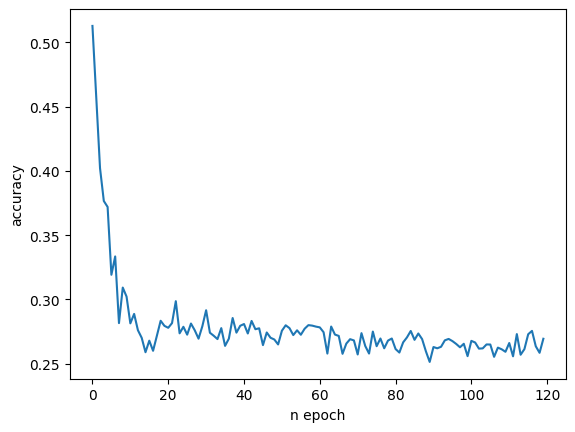

In [8]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('n epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

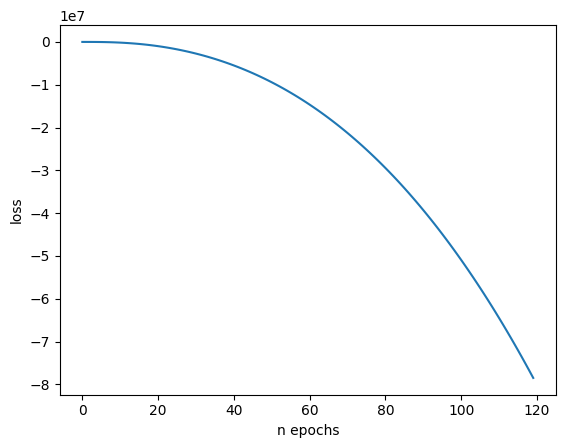

In [9]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

## Prediction & Export


120/120 [==============================] - 0s 2ms/step


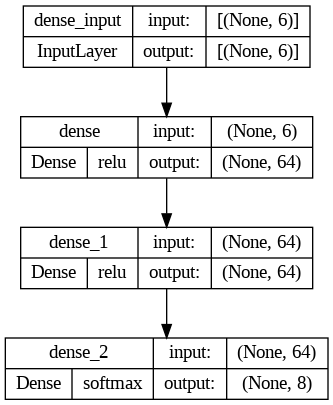

In [10]:
y_test = model.predict(x_test_dataset)
#Flattening the array
y_test_flatten = np.argmax(y_test,axis=1)
#Convert to dataset
y_test_dataFrame = pd.DataFrame(y_test_flatten, columns = ['target'])

for x in y_test_dataFrame:
  y_test_dataFrame[x]+=1

y_test_dataFrame.to_csv('/content/drive/MyDrive/Colab Notebooks/prediction.csv',index_label='id' )
tf.keras.utils.plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/current_model.png', show_shapes=True,    show_layer_activations=True)


#y_test

In [11]:
pd.DataFrame(y_test)

,0,1,2,3,4,5,6,7
0,0.000000,0.0,0.999569,0.000431,0.0,0.000000,0.0,0.0
1,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.999942,0.000058,0.0,0.000000,0.0,0.0
3,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.006693,0.0,0.000000,0.000000,0.0,0.993307,0.0,0.0
...,...,...,...,...,...,...,...,...
3835,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0
3836,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3837,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3838,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0


In [12]:
y_test_flatten

array([3, 3, 3, ..., 1, 7, 1])